## Producer Per index Forecast

# NOTE: Due to a very very long execution time, p and q values for seasonal data is limited to 3.

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import adfuller
from statsmodels.tsa.api import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('ppi.csv')
df1

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa,t,lnppi,dppi,dlnppi,lppi,trend
0,1960q1,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67000,1960q2,3.234749,NaN,NaN,NaN,1
1,1960q2,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47000,1960q3,3.236323,0.040001,0.001574,25.400000,2
2,1960q3,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33000,1960q4,3.233567,-0.070000,-0.002755,25.440001,3
3,1960q4,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23000,1961q1,3.234749,0.029999,0.001182,25.370001,4
4,1961q1,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40000,1961q2,3.238286,0.090000,0.003537,25.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2001q1,7400.20020,110.430000,115.300000,9334.5000,1098.13000,309.92001,2001q2,4.704382,1.790001,0.016342,108.640000,165
165,2001q2,7597.50000,109.200000,116.500000,9341.7002,1118.85000,309.72000,2001q3,4.693181,-1.230003,-0.011201,110.430000,166
166,2001q3,7764.60010,106.900000,116.660000,9310.4004,1156.50000,330.98001,2001q4,4.671894,-2.299995,-0.021287,109.200000,167
167,2001q4,8067.89990,103.690000,116.330000,9348.5996,1174.46000,334.92999,2002q1,4.641406,-3.209999,-0.030488,106.900000,168


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yearqrt  169 non-null    object 
 1   m3       169 non-null    float64
 2   ppi      169 non-null    float64
 3   cpi      169 non-null    float64
 4   gdp      169 non-null    float64
 5   m1nsa    169 non-null    float64
 6   ddnsa    169 non-null    float64
 7   t        169 non-null    object 
 8   lnppi    169 non-null    float64
 9   dppi     168 non-null    float64
 10  dlnppi   168 non-null    float64
 11  lppi     168 non-null    float64
 12  trend    169 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 17.3+ KB


In [4]:
df = df1[['yearqrt', 'm3', 'ppi', 'cpi', 'gdp', 'm1nsa', 'ddnsa']]
df

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa
0,1960q1,692.00000,25.400000,19.280001,2391.0000,140.53000,111.67000
1,1960q2,701.59998,25.440001,19.400000,2379.2000,138.42999,109.47000
2,1960q3,709.50000,25.370001,19.450001,2383.6001,139.60001,110.33000
3,1960q4,722.09998,25.400000,19.559999,2352.8999,142.67999,113.23000
4,1961q1,726.20001,25.490000,19.570000,2366.5000,142.22000,113.40000
...,...,...,...,...,...,...,...
164,2001q1,7400.20020,110.430000,115.300000,9334.5000,1098.13000,309.92001
165,2001q2,7597.50000,109.200000,116.500000,9341.7002,1118.85000,309.72000
166,2001q3,7764.60010,106.900000,116.660000,9310.4004,1156.50000,330.98001
167,2001q4,8067.89990,103.690000,116.330000,9348.5996,1174.46000,334.92999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yearqrt  169 non-null    object 
 1   m3       169 non-null    float64
 2   ppi      169 non-null    float64
 3   cpi      169 non-null    float64
 4   gdp      169 non-null    float64
 5   m1nsa    169 non-null    float64
 6   ddnsa    169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [6]:
import re
l = []

for i in df['yearqrt'].values:
    text = re.sub('q[0-9]*', '', str(i))
    l.append(text)
df['yearqrt'] = l

In [7]:
df[df.duplicated()]

,yearqrt,m3,ppi,cpi,gdp,m1nsa,ddnsa


In [8]:
# add a new date colum 
df.drop(df.tail(1).index, inplace = True)
d1 = pd.date_range(start = "1/1/1960", end = "1/1/2002", freq = "Q")
df['tdate'] = d1

In [9]:
df.dtypes

yearqrt            object
m3                float64
ppi               float64
cpi               float64
gdp               float64
m1nsa             float64
ddnsa             float64
tdate      datetime64[ns]
dtype: object

In [10]:
# set time data as index
df = df.set_index('tdate')
df.drop(['yearqrt'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1960-03-31 to 2001-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m3      168 non-null    float64
 1   ppi     168 non-null    float64
 2   cpi     168 non-null    float64
 3   gdp     168 non-null    float64
 4   m1nsa   168 non-null    float64
 5   ddnsa   168 non-null    float64
dtypes: float64(6)
memory usage: 9.2 KB


In [12]:
df.describe()

,m3,ppi,cpi,gdp,m1nsa,ddnsa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2699.038094,64.451071,58.424286,5280.934518,545.814823,242.105060
std,1917.767066,30.207334,32.770803,1976.169274,365.953942,88.207620
min,615.700010,25.240000,19.280001,2352.899900,138.429990,109.470000
25%,1031.525000,29.617500,25.570000,3584.699975,208.322508,159.825007
50%,2028.099950,75.884998,56.865000,4930.850100,413.344990,239.645000
75%,4203.024900,93.210001,89.164999,6719.774900,853.077513,295.975000
max,8067.899900,110.430000,116.660000,9348.599600,1174.460000,408.899990


### Data Analysis

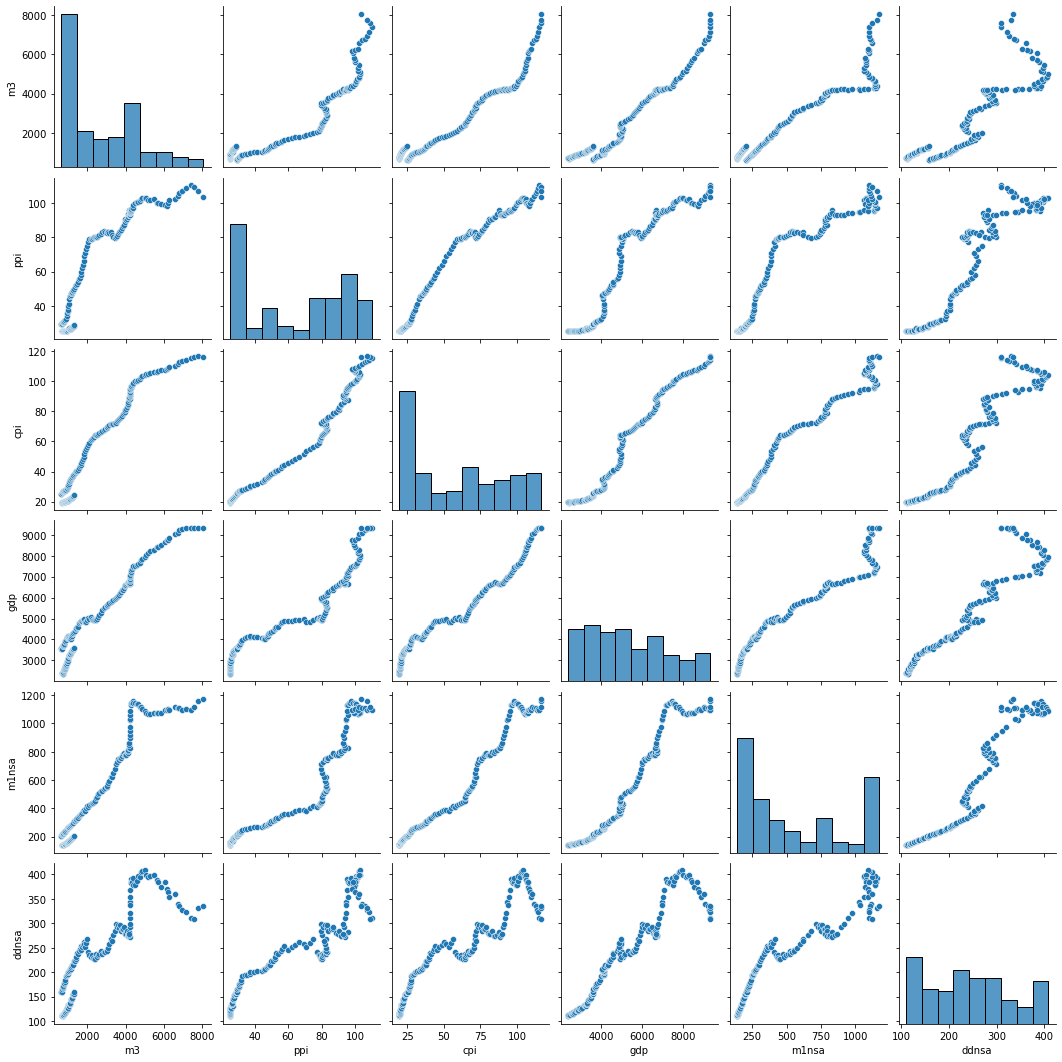

In [13]:
sb.pairplot(df);

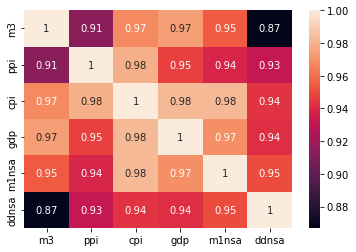

In [14]:
sb.heatmap(df.corr(), annot = True);

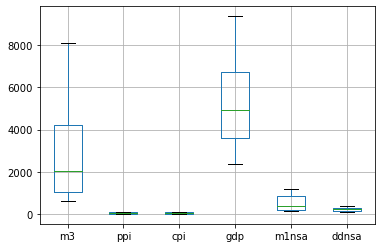

In [15]:
df.boxplot();

In [16]:
df.skew(axis = 0, skipna = True)

m3       0.808482
ppi     -0.110440
cpi      0.268624
gdp      0.414586
m1nsa    0.493088
ddnsa    0.214558
dtype: float64

### Check trend/seasonality

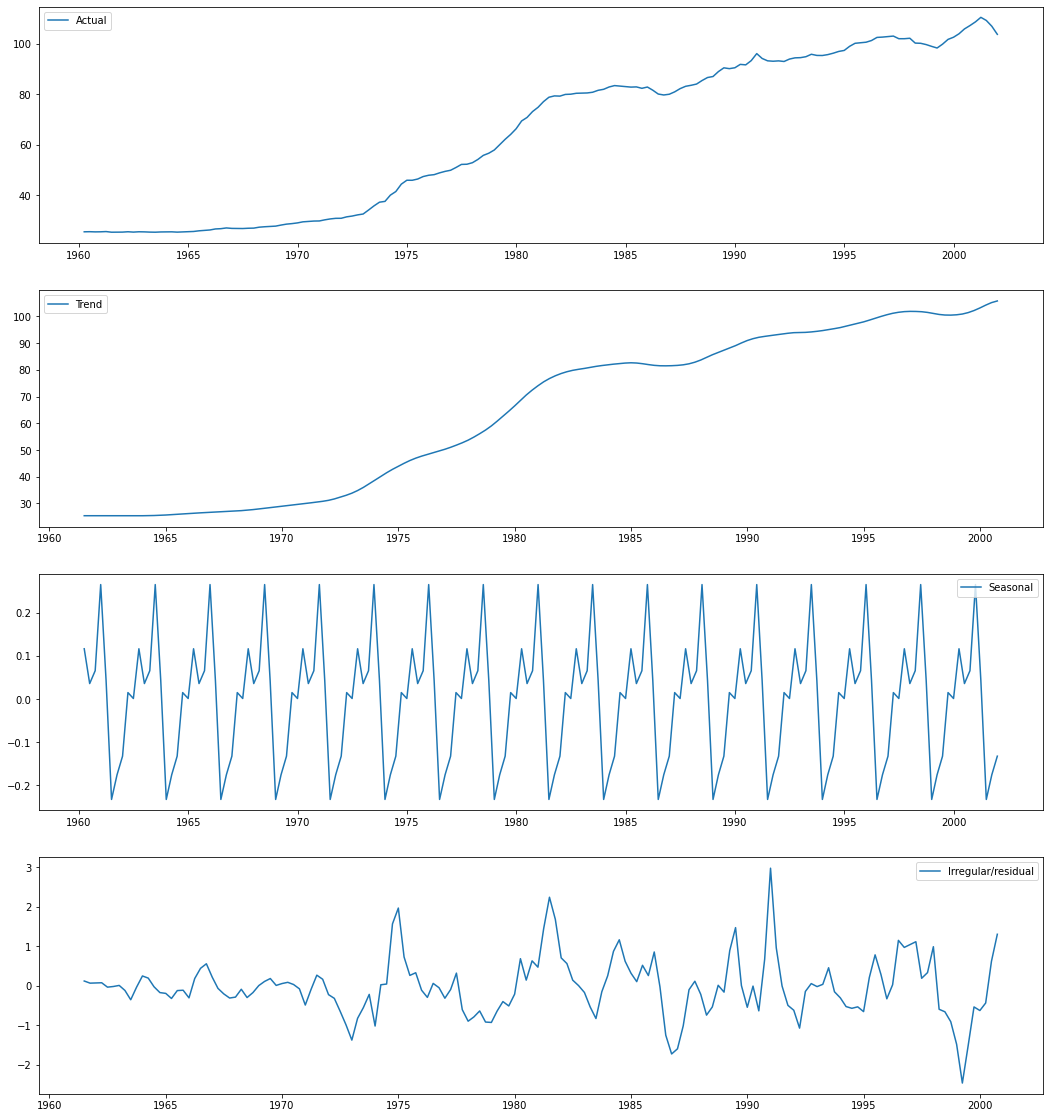

In [55]:
pi = df['ppi']
ts_comp = seasonal_decompose(pi, period = 10)

# individual components
d_trend = ts_comp.trend
d_seasonal = ts_comp.seasonal
d_residual = ts_comp.resid

# plot the components
_, ax = plt.subplots(4, 1, figsize = (18, 20)) # if we are not interested in naming variable of return value, then write _ # like x,y = plt(1,2) then if we dont care of return of 1, write _,y = plt(1,2)

# actual data
plt.subplot(411)
plt.plot(pi, label = 'Actual')
plt.legend()

# trend
plt.subplot(412)
plt.plot(d_trend, label = 'Trend')
plt.legend()

# seasonal
plt.subplot(413)
plt.plot(d_seasonal, label = 'Seasonal')
plt.legend()

# irregular/residual
plt.subplot(414)
plt.plot(d_residual, label = 'Irregular/residual')
plt.legend();

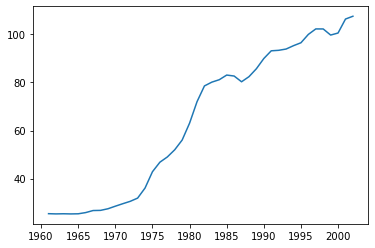

In [53]:
dff = df.resample('Y').mean()
dff_ppi = dff.ppi
plt.plot(dff_ppi);

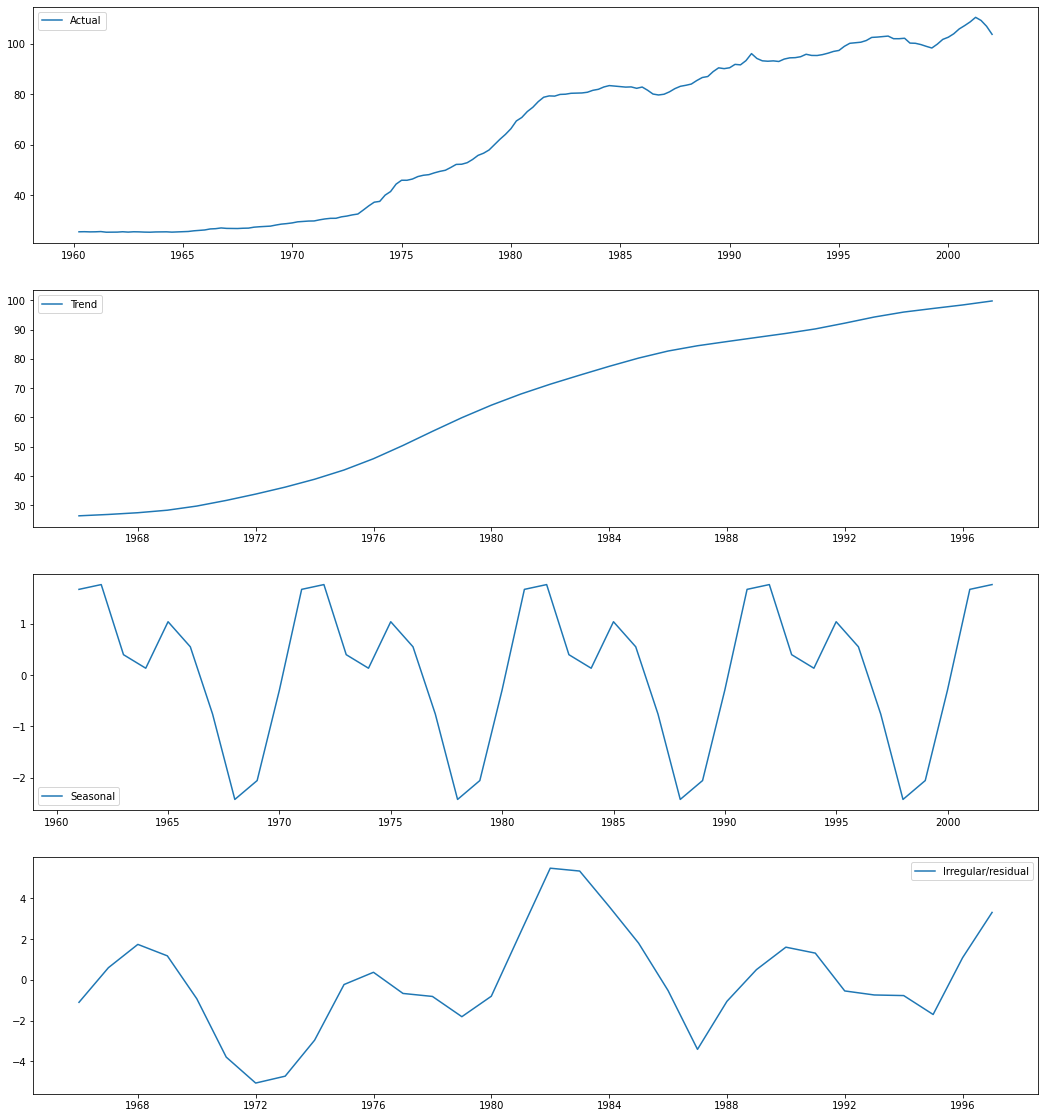

In [58]:
pi = df['ppi']
ts_comp = seasonal_decompose(dff_ppi, period = 10)

# individual components
d_trend = ts_comp.trend
d_seasonal = ts_comp.seasonal
d_residual = ts_comp.resid

# plot the components
_, ax = plt.subplots(4, 1, figsize = (18, 20)) # if we are not interested in naming variable of return value, then write _ # like x,y = plt(1,2) then if we dont care of return of 1, write _,y = plt(1,2)

# actual data
plt.subplot(411)
plt.plot(pi, label = 'Actual')
plt.legend()

# trend
plt.subplot(412)
plt.plot(d_trend, label = 'Trend')
plt.legend()

# seasonal
plt.subplot(413)
plt.plot(d_seasonal, label = 'Seasonal')
plt.legend()

# irregular/residual
plt.subplot(414)
plt.plot(d_residual, label = 'Irregular/residual')
plt.legend();

### Data is having trend + 10 years seasonality

### Check Data Stationarity

In [18]:
def CheckStationarity(data):
    p_value = adfuller(data)[1]
    
    if p_value < 0.05:
        msg = 'Data is stationary. Proceed to model building.'
    else:
        msg = 'Data is not stationary. Difference the data before model building.'
    
    return(msg)

Data is not stationary. Difference the data before model building.


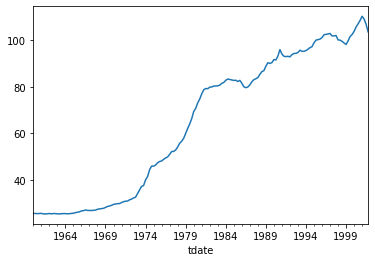

In [19]:
print(CheckStationarity(pi))
pi.plot(figsize=(6, 4));

In [20]:
# difference the data
d = 1
pi1 = pi - pi.shift(d) 
pi1 = pd.DataFrame({'ppi_diff': pi1})
# df = pd.concat([df,pi1], axis = 1)
pi1 = pi1.dropna()

Data is not stationary. Difference the data before model building.


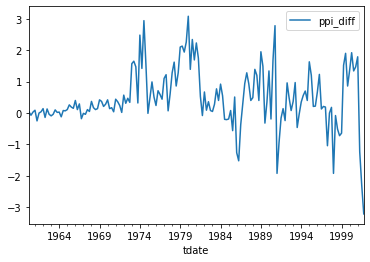

In [21]:
print(CheckStationarity(pi1))
pi1.plot(figsize=(6, 4));

In [22]:
# difference the data
d = 2
pi2 = pi1['ppi_diff'] - pi1['ppi_diff'].shift(d) 
pi2 = pd.DataFrame({'ppi_diff_2': pi2})
# df = pd.concat([df,pi2], axis = 1)
pi2 = pi2.dropna()

Data is stationary. Proceed to model building.


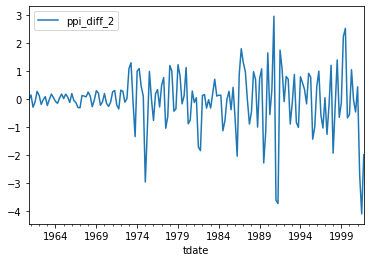

In [23]:
print(CheckStationarity(pi2))
pi2.plot(figsize=(6, 4));

### PACF/ACF plots

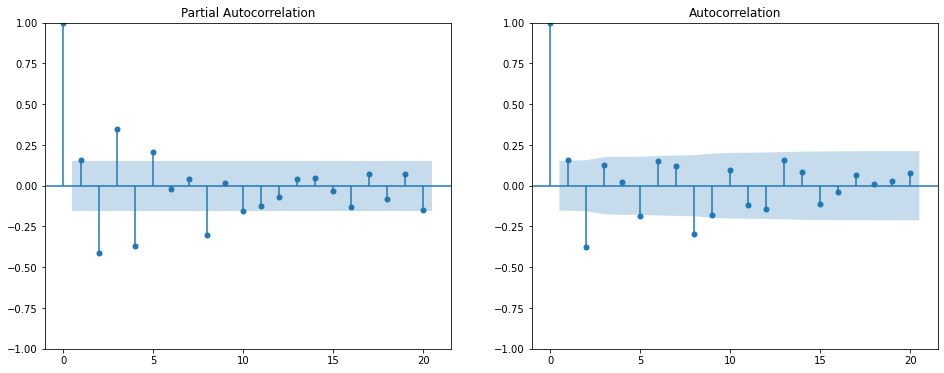

In [24]:
# ACF/PACF # correlogram on original data
_, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_pacf(pi2, lags = 20, ax = ax[0]);
plot_acf(pi2, lags = 20, ax = ax[1]);

In [25]:
# p = [0,1,2,3,4,5,6,7]
# q = [0,1,2,3,4]

In [26]:
ts_comp = seasonal_decompose(pi2, period = 4)

# individual components
d_trend = ts_comp.trend
d_seasonal = ts_comp.seasonal
d_residual = ts_comp.resid

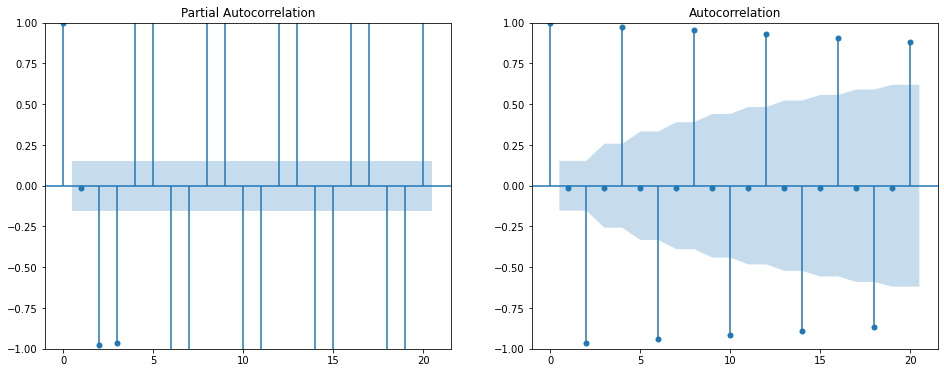

In [27]:
# ACF/PACF # correlogram on seasonal data
_, ax = plt.subplots(1, 2, figsize = (16, 6))

plot_pacf(d_seasonal, lags = 20, ax = ax[0]);
plot_acf(d_seasonal, lags = 20, ax = ax[1]);

### split data

In [28]:
ratio = 0.8
ss = int(len(pi) * ratio)

train_df = pi.iloc[:ss]
test_df = pi.iloc[ss:]

print('train_df len : ', len(train_df), '\ntest_df len : ', len(test_df))

train = train_df
test = test_df
print('train len = ', len(train), '\ntest len = ', len(test))

train_df len :  134 
test_df len :  34
train len =  134 
test len =  34


## Build the ARIMA Model

In [29]:
def arima_model(p, d1, q):
    m1 = ARIMA(train, order = (p, d1, q)).fit()

    lags = [1, 5, 10, 15, 20, 30]
    for i in lags:
        pvalue = sm.stats.acorr_ljungbox(m1.resid, lags = i, return_df = True).lb_pvalue.values
        if pvalue.all() > 0.05:
            forecast = m1.forecast(len(test))
            mse = mean_squared_error(test, forecast)
            r_mse = round(np.sqrt(mse), 2)
    return (pvalue,r_mse)

In [30]:
p1 = [0, 1, 2, 3, 4, 5, 6, 7]
d1 = 2
q1 = [0, 1, 2, 3, 4]
p = []
d = []
q = []
rmse = []
pval = []

for i in p1:
    for j in q1:
        p.append(i)
        d.append(d1)
        q.append(j)
        val,error = arima_model(i, d1, j)
        pval.append(val)
        rmse.append(error)

# create dataframe
data = {
    'p': p,
    'd': d,
    'q': q,
    'lj_test': pval,
    'rmse': rmse
}
best_model_params = pd.DataFrame(data)
best_df = best_model_params.sort_values(by = 'rmse')
best_df.head(5)

,p,d,q,lj_test,rmse
39,7,2,4,"[1.2423034417655901e-05, 7.122531115531146e-05...",2.49
18,3,2,3,"[1.2813204189268608e-05, 7.328645863733643e-05...",2.61
24,4,2,4,"[1.2983493148616907e-05, 7.409090978071484e-05...",2.63
14,2,2,4,"[1.3526359475337842e-05, 7.72474770369446e-05,...",2.64
29,5,2,4,"[1.3101541725455705e-05, 7.491630092792253e-05...",2.75



Best ARIMA Model

p = 7, d = 2, q = 4

P_value of LJungbox test =  [1.24230344e-05 7.12253112e-05 2.60758210e-04 7.49754097e-04
 1.82419671e-03 3.93664098e-03 7.75514091e-03 1.41125749e-02
 2.37688264e-02 3.80810343e-02 5.79084640e-02 8.41374238e-02
 1.17436017e-01 1.57936091e-01 2.05264188e-01 2.58785840e-01
 3.16472902e-01 3.78633192e-01 4.42308865e-01 5.07056646e-01
 5.70252634e-01 6.30896604e-01 6.87377939e-01 7.38524511e-01
 7.83655993e-01 8.20303779e-01 8.54124737e-01 8.84607881e-01
 9.09944070e-01 9.30688431e-01]

RMSE =  2.49


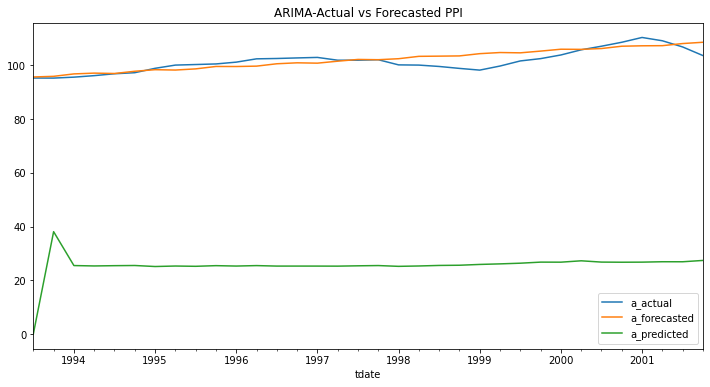

In [31]:
# build model using best params
model = ARIMA(train, order = (best_df['p'].iat[0], best_df['d'].iat[0], best_df['q'].iat[0])).fit()
f = model.forecast(len(test))
f1 = model.predict(0, len(test) - 1)
aic_a = round(model.aic, 2)

# to store actual, forcasted and predicted values in DF for analysis
actual = []
forecast = []
pred = []

for i in f:
    forecast.append(i)
    
for i in range(len(test)):
#     actual.append(test[i])
    pred.append(f1[i])
    
df_final_a = pd.DataFrame({'a_actual': test,
                         'a_forecasted': forecast,
                         'a_predicted': pred})

# plot the actual and forecast data
print("\n\033[1mBest ARIMA Model")
print("\np = {}, d = {}, q = {}".format(best_df['p'].iat[0], best_df['d'].iat[0], best_df['q'].iat[0]))
print('\nP_value of LJungbox test = ', best_df['lj_test'].iat[0])
print('\nRMSE = ', best_df['rmse'].iat[0])

df_final_a.a_actual.plot(figsize = (12,6), legend = True)
df_final_a.a_forecasted.plot(legend = True)
df_final_a.a_predicted.plot(legend = True)
plt.title('ARIMA-Actual vs Forecasted PPI');

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ppi   No. Observations:                  134
Model:                 ARIMA(7, 2, 4)   Log Likelihood                -129.086
Date:                Tue, 11 Oct 2022   AIC                            282.173
Time:                        15:36:55   BIC                            316.766
Sample:                    03-31-1960   HQIC                           296.230
                         - 06-30-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1278      0.485     -2.325      0.020      -2.079      -0.177
ar.L2         -1.0684      0.905     -1.181      0.238      -2.841       0.705
ar.L3         -0.4822      1.145     -0.421      0.674      -2.727       1.762
ar.L4          0.2730      1.151      0.237      0.813      -1.983       2.529
ar.L5          0.0172      0.702      0.024      0.980      -1.358       1.393
ar.L6          0.1183      0.436      0.272      0.786      -0.735       0.972
ar.L7          0.0493      0.237      0.208      0.835      -0.415       0.513
ma.L1          0.6524      0.479      1.362      0.173      -0.287       1.591
ma.L2          0.3743      0.685      0.547      0.585      -0.968       1.716
ma.L3         -0.1720      0.609     -0.282      0.778      -1.366       1.022
ma.L4         -0.6491      0.487     -1.334      0.182      -1.603       0.305
sigma2         0.4042      0.047      8.522      0.000       0.311       0.497
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               152.00
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              25.63   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Build the SARIMA Model

In [33]:
def sarima_model(p, d1, q, P, D1, Q):
    m1 = SARIMAX(train, order = (p, d1, q), seasonal_order = (P, D1, Q, 40)).fit()
    pvalue = sm.stats.acorr_ljungbox(m1.resid, lags = 10, return_df = True).lb_pvalue.values
    if pvalue.all() > 0.05:
        forecast = m1.forecast(len(test))
        mse = mean_squared_error(test, forecast)
        r_mse = round(np.sqrt(mse), 2)
    return (pvalue,r_mse)

In [34]:
p1 = [0,1,2,3]
d1 = 2
q1 = [0,1,2,3]
P1 = [0,1,2]
D1 = 0
Q1 = [0,1,2]
p = []
d = []
q = []
P = []
D = []
Q = []
rmse = []
pval = []

for i in p1:
    for j in q1:
        for a in P1:
            for b in Q1:
                p.append(i)
                d.append(d1)
                q.append(j)
                P.append(a)
                D.append(D1)
                Q.append(b)
                val,error = sarima_model(i, d1, j, a, D1, b)
                pval.append(val)
                rmse.append(error)

# create dataframe
data = {
    'p': p,
    'd': d,
    'q': q,
    'P': P,
    'D': D,
    'Q': Q,
    'lj_test': pval,
    'rmse': rmse
}
best_model_params = pd.DataFrame(data)
best_df_s = best_model_params.sort_values(by = 'rmse')
best_df_s

,p,d,q,P,D,Q,lj_test,rmse
138,3,2,3,1,0,0,"[1.275363573408762e-05, 7.294599988364145e-05,...",2.43
136,3,2,3,0,0,1,"[1.2535632976442075e-05, 7.174215179925977e-05...",2.45
135,3,2,3,0,0,0,"[1.2813204189268608e-05, 7.328645863733643e-05...",2.61
137,3,2,3,0,0,2,"[1.2235826208062705e-05, 7.01290622527228e-05,...",2.73
141,3,2,3,2,0,0,"[1.227533384824644e-05, 7.030348284382973e-05,...",2.85
...,...,...,...,...,...,...,...,...
7,0,2,0,2,0,1,"[4.868610483071281e-06, 2.7767883178146356e-05...",13.73
5,0,2,0,1,0,2,"[4.868474822442393e-06, 2.776717121678981e-05,...",13.74
2,0,2,0,0,0,2,"[4.84584755688531e-06, 2.7652533740429707e-05,...",13.81
6,0,2,0,2,0,0,"[4.851082763044294e-06, 2.767890766267787e-05,...",13.86



Best SARIMA Model

p = 3, d = 2, q = 3

P = 1, D = 0, Q = 0

P_value of LJungbox test =  [1.27536357e-05 7.29459999e-05 2.66760644e-04 7.59582161e-04
 1.84886651e-03 3.97086319e-03 7.82334569e-03 1.42137445e-02
 2.39295215e-02 3.83666884e-02]

RMSE =  2.43


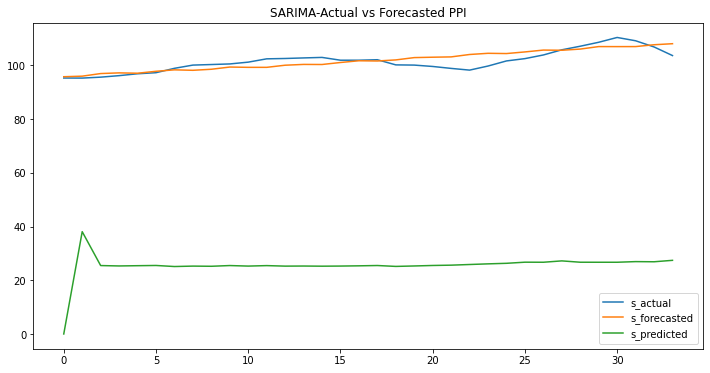

In [35]:
# build model using best params
model = SARIMAX(train, order = (best_df_s['p'].iat[0], best_df_s['d'].iat[0], best_df_s['q'].iat[0]), seasonal_order = (best_df_s['P'].iat[0], best_df_s['D'].iat[0], best_df_s['Q'].iat[0], 40)).fit()
f = model.forecast(len(test))
f1 = model.predict(0, len(test) - 1)
mse = mean_squared_error(test, f1)
rmse_p_s = round(np.sqrt(mse), 2)
aic_s = model.aic

# to store actual, forcasted and predicted values in DF for analysis
actual = []
forecast = []
pred = []

for i in f:
    forecast.append(i)
    
for i in range(len(f1)):
    actual.append(test[i])
    pred.append(f1[i])
    
df_final_s = pd.DataFrame({'s_actual': actual,
                         's_forecasted': forecast,
                         's_predicted': pred})

# plot the actual and forecast data
print("\n\033[1mBest SARIMA Model")
print("\np = {}, d = {}, q = {}".format(best_df_s['p'].iat[0], best_df_s['d'].iat[0], best_df_s['q'].iat[0]))
print("\nP = {}, D = {}, Q = {}".format(best_df_s['P'].iat[0], best_df_s['D'].iat[0], best_df_s['Q'].iat[0]))
print('\nP_value of LJungbox test = ', best_df_s['lj_test'].iat[0])
print('\nRMSE = ', best_df_s['rmse'].iat[0])

df_final_s.s_actual.plot(figsize = (12, 6), legend = True)
df_final_s.s_forecasted.plot(legend = True)
df_final_s.s_predicted.plot(legend = True)
plt.title('SARIMA-Actual vs Forecasted PPI');

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 ppi   No. Observations:                  134
Model:             SARIMAX(3, 2, 3)x(1, 0, [], 40)   Log Likelihood                -129.570
Date:                             Tue, 11 Oct 2022   AIC                            275.140
Time:                                     15:45:28   BIC                            298.203
Sample:                                 03-31-1960   HQIC                           284.512
                                      - 06-30-1993                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0920      0.131     -0.704      0.482      -0.348       0.164
ar.L2         -0.6850      0.093     -7.390      0.000      -0.867      -0.503
ar.L3          0.4857      0.117      4.137      0.000       0.256       0.716
ma.L1         -0.3991      0.112     -3.550      0.000      -0.619      -0.179
ma.L2          0.5000      0.077      6.513      0.000       0.350       0.651
ma.L3         -0.8280      0.073    -11.417      0.000      -0.970      -0.686
ar.S.L40       0.0722      0.128      0.564      0.573      -0.179       0.323
sigma2         0.4084      0.043      9.436      0.000       0.324       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               168.21
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              23.07   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Build the ARIMAX Model

In [37]:
ratio = 0.8
ss = int(len(df) * ratio)

train_df = df.iloc[:ss]
test_df = df.iloc[ss:]
print('train_df len : ', len(train_df), '\ntest_df len : ', len(test_df))

train = train_df.ppi
test = test_df.ppi
print('train len = ', len(train), '\ntest len = ', len(test))

train_df len :  134 
test_df len :  34
train len =  134 
test len =  34


In [38]:
exog_train = train_df[['m3', 'cpi', 'm1nsa', 'ddnsa']]
exog_test = test_df[['m3', 'cpi', 'm1nsa', 'ddnsa']]

In [39]:
def arimax_model(p, d1, q):
    m2 = SARIMAX(train, order = (p, d1, q), seasonal_order = (0, 0, 0, 0), exog = exog_train.values).fit()

    lags = [1, 5, 10, 15, 20, 30]
    for i in lags:
        pvalue = sm.stats.acorr_ljungbox(m2.resid, lags = i, return_df = True).lb_pvalue.values
        if pvalue.all() > 0.05:
            forecast = m2.forecast(len(test), exog = exog_test.values)
            mse = mean_squared_error(test, forecast)
            r_mse = round(np.sqrt(mse), 2)
    return (pvalue,r_mse)

In [40]:
p1 = [0, 1, 2, 3, 4, 5, 6, 7]
d1 = 2
q1 = [0, 1, 2, 3, 4]
p = []
d = []
q = []
rmse = []
pval = []

for i in p1:
    for j in q1:
        p.append(i)
        d.append(d1)
        q.append(j)
        val,error = arimax_model(i, d1, j)
        pval.append(val)
        rmse.append(error)

# create dataframe
data = {
    'p': p,
    'd': d,
    'q': q,
    'lj_test': pval,
    'rmse': rmse
}
best_model_params = pd.DataFrame(data)
best_df_ax = best_model_params.sort_values(by = 'rmse')
best_df_ax.head(5)

,p,d,q,lj_test,rmse
9,1,2,4,"[0.0004620753891858052, 0.0021468467086739997,...",1.76
17,3,2,2,"[0.06731857588751536, 0.18379686907572657, 0.2...",2.07
10,2,2,0,"[0.0024549385136382234, 0.008293532642043612, ...",2.16
6,1,2,1,"[0.011261690177025748, 0.03718078178542188, 0....",2.20
4,0,2,4,"[0.0015582949053804297, 0.006331873161069278, ...",2.31



Best ARIMAX Model

p = 1, d = 2, q = 4

P_value of LJungbox test =  [4.62075389e-04 2.14684671e-03 6.31229561e-03 1.45493066e-02
 2.80100064e-02 5.07797695e-02 8.38791291e-02 1.09979327e-01
 1.60128265e-01 2.03217111e-01 2.65717493e-01 3.37812505e-01
 4.14303318e-01 4.92078505e-01 5.68201313e-01 6.39709865e-01
 7.05253296e-01 7.63373889e-01 8.11577184e-01 8.44496505e-01
 8.81257316e-01 9.05036814e-01 9.29733311e-01 9.48217656e-01
 9.62731762e-01 9.72209601e-01 9.79582142e-01 9.85659568e-01
 9.89872862e-01 9.92808567e-01]

RMSE =  1.76


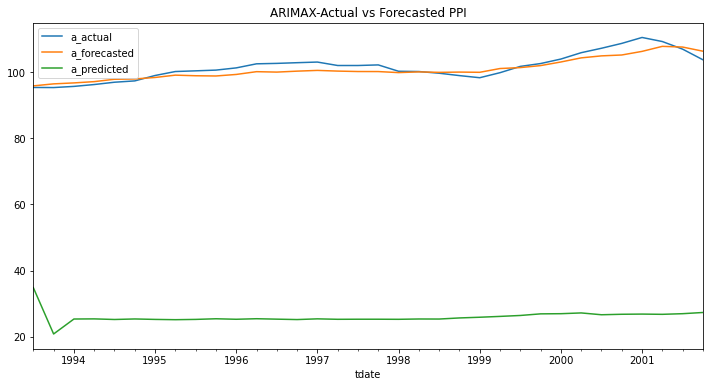

In [41]:
# build model using best params
model = SARIMAX(train, order = (best_df_ax['p'].iat[0], best_df_ax['d'].iat[0], best_df_ax['q'].iat[0]), seasonal_order = (0, 0, 0, 0), exog = exog_train.values).fit()
f = model.forecast(len(test), exog = exog_test.values)
f1 = model.predict(0, len(test) - 1, exog = exog_test.values)
aic_ax = round(model.aic, 2)

# to store actual, forcasted and predicted values in DF for analysis
actual = []
forecast = []
pred = []

for i in f:
    forecast.append(i)
    
for i in range(len(test)):
#     actual.append(test[i])
    pred.append(f1[i])
    
df_final_ax = pd.DataFrame({'a_actual': test,
                         'a_forecasted': forecast,
                         'a_predicted': pred})

# plot the actual and forecast data
print("\n\033[1mBest ARIMAX Model")
print("\np = {}, d = {}, q = {}".format(best_df_ax['p'].iat[0], best_df_ax['d'].iat[0], best_df_ax['q'].iat[0]))
print('\nP_value of LJungbox test = ', best_df_ax['lj_test'].iat[0])
print('\nRMSE = ', best_df_ax['rmse'].iat[0])

df_final_ax.a_actual.plot(figsize = (12, 6), legend = True)
df_final_ax.a_forecasted.plot(legend = True)
df_final_ax.a_predicted.plot(legend = True)
plt.title('ARIMAX-Actual vs Forecasted PPI');

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ppi   No. Observations:                  134
Model:               SARIMAX(1, 2, 4)   Log Likelihood                -105.737
Date:                Tue, 11 Oct 2022   AIC                            231.474
Time:                        15:45:55   BIC                            260.302
Sample:                    03-31-1960   HQIC                           243.188
                         - 06-30-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002      0.001     -0.152      0.879      -0.003       0.003
x2             1.7546      0.158     11.126      0.000       1.446       2.064
x3             0.0137      0.015      0.889      0.374      -0.016       0.044
x4            -0.0067      0.019     -0.360      0.719      -0.043       0.030
ar.L1         -0.6299      0.429     -1.469      0.142      -1.470       0.211
ma.L1         -0.1488      0.409     -0.364      0.716      -0.950       0.652
ma.L2         -0.5420      0.345     -1.570      0.116      -1.219       0.135
ma.L3          0.1323      0.074      1.784      0.074      -0.013       0.278
ma.L4          0.2998      0.107      2.806      0.005       0.090       0.509
sigma2         0.2909      0.033      8.781      0.000       0.226       0.356
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                47.86
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):              15.59   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Build the SARIMAX Model

In [43]:
def sarima_model_2(p, d1, q, P, D1, Q):
    m2 = SARIMAX(train, order = (p, d1, q), seasonal_order = (P, D1, Q, 40), exog = exog_train.values).fit()

    lags = [1, 5, 10, 15, 20, 30]
    for i in lags:
        pvalue = sm.stats.acorr_ljungbox(m2.resid, lags = i, return_df = True).lb_pvalue.values
        if pvalue.all() > 0.05:
            forecast = m2.forecast(len(test), exog = exog_test.values)
            mse = mean_squared_error(test, forecast)
            r_mse = round(np.sqrt(mse), 2)
    return (pvalue,r_mse)

In [44]:
p1 = [0,1,2,3]
d1 = 2
q1 = [0,1,2,3]
P1 = [0,1,2]
D1 = 0
Q1 = [0,1,2]
p = []
d = []
q = []
P = []
D = []
Q = []
rmse = []
pval = []

for i in p1:
    for j in q1:
        for a in P1:
            for b in Q1:
                p.append(i)
                d.append(d1)
                q.append(j)
                P.append(a)
                D.append(D1)
                Q.append(b)
                val,error = sarima_model_2(i, d1, j, a, D1, b)
                pval.append(val)
                rmse.append(error)

# create dataframe
data = {
    'p': p,
    'd': d,
    'q': q,
    'P': P,
    'D': D,
    'Q': Q,
    'lj_test': pval,
    'rmse': rmse
}
best_model_params = pd.DataFrame(data)
best_df_sx = best_model_params.sort_values(by = 'rmse')
best_df_sx.head(5)

,p,d,q,P,D,Q,lj_test,rmse
33,0,2,3,2,0,0,"[0.004089504812138818, 0.015985963081978118, 0...",1.70
48,1,2,1,1,0,0,"[0.04904615282307831, 0.13473065175899493, 0.1...",1.78
77,2,2,0,1,0,2,"[0.004145311889670567, 0.013325017410988148, 0...",1.78
29,0,2,3,0,0,2,"[0.001470045433337642, 0.006247188894731687, 0...",1.97
74,2,2,0,0,0,2,"[0.0017832691714882902, 0.006497772562623016, ...",1.99



Best SARIMAX Model

p = 0, d = 2, q = 3

P = 2, D = 0, Q = 0

P_value of LJungbox test =  [0.0040895  0.01598596 0.04065361 0.08083386 0.11324644 0.17246861
 0.25114068 0.25453074 0.33257141 0.36545615 0.43566977 0.51898779
 0.59788645 0.67103994 0.73882453 0.7972413  0.84485607 0.88304731
 0.91004178 0.90878962 0.93380468 0.94775489 0.96293409 0.97298961
 0.98152416 0.98406449 0.98911136 0.99251329 0.99383781 0.99575298]

RMSE =  1.7


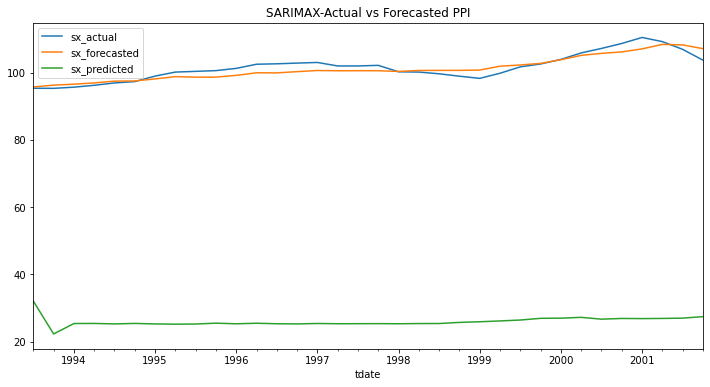

In [45]:
# build model using best params
model = SARIMAX(train, order = (best_df_sx['p'].iat[0], best_df_sx['d'].iat[0], best_df_sx['q'].iat[0]), seasonal_order = (best_df_sx['P'].iat[0], best_df_sx['D'].iat[0], best_df_sx['Q'].iat[0], 40), exog = exog_train.values).fit()
f = model.forecast(len(test), exog = exog_test.values)
f1 = model.predict(0, len(test) - 1, exog = exog_test.values)
mse = mean_squared_error(test, f1)
rmse_p_sx = round(np.sqrt(mse), 2)
aic_sx = round(model.aic, 2)

# to store actual, forcasted and predicted values in DF for analysis
actual = []
forecast = []
pred = []

for i in f:
    forecast.append(i)
    
for i in range(len(f1)):
#     actual.append(test[i])
    pred.append(f1[i])
    
df_final_sx = pd.DataFrame({'sx_actual': test,
                         'sx_forecasted': forecast,
                         'sx_predicted': pred})

# plot the actual and forecast data
print("\n\033[1mBest SARIMAX Model")
print("\np = {}, d = {}, q = {}".format(best_df_sx['p'].iat[0], best_df_sx['d'].iat[0], best_df_sx['q'].iat[0]))
print("\nP = {}, D = {}, Q = {}".format(best_df_sx['P'].iat[0], best_df_sx['D'].iat[0], best_df_sx['Q'].iat[0]))
print('\nP_value of LJungbox test = ', best_df_sx['lj_test'].iat[0])
print('\nRMSE = ', best_df_sx['rmse'].iat[0])

df_final_sx.sx_actual.plot(figsize = (12, 6), legend = True)
df_final_sx.sx_forecasted.plot(legend = True)
df_final_sx.sx_predicted.plot(legend = True)
plt.title('SARIMAX-Actual vs Forecasted PPI');

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 ppi   No. Observations:                  134
Model:             SARIMAX(0, 2, 3)x(2, 0, [], 40)   Log Likelihood                -106.522
Date:                             Tue, 11 Oct 2022   AIC                            233.043
Time:                                     16:05:17   BIC                            261.871
Sample:                                 03-31-1960   HQIC                           244.758
                                      - 06-30-1993                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0003      0.002     -0.182      0.856      -0.004       0.003
x2             1.6449      0.181      9.085      0.000       1.290       2.000
x3             0.0096      0.015      0.631      0.528      -0.020       0.039
x4            -0.0072      0.020     -0.361      0.718      -0.046       0.032
ma.L1         -0.7908      0.077    -10.204      0.000      -0.943      -0.639
ma.L2         -0.0584      0.092     -0.632      0.527      -0.239       0.123
ma.L3          0.2075      0.081      2.574      0.010       0.050       0.365
ar.S.L40       0.0836      0.155      0.540      0.589      -0.220       0.387
ar.S.L80      -0.0924      0.357     -0.259      0.796      -0.792       0.607
sigma2         0.2906      0.036      8.147      0.000       0.221       0.361
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                41.59
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              16.15   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
names = ['ARIMA', 'ARIMAX', 'SARIMA', 'SARIMAX']
aic = [aic_a, aic_a, aic_s, aic_sx]
rmse = [best_df['rmse'].iat[0], best_df_ax['rmse'].iat[0], best_df_s['rmse'].iat[0], best_df_sx['rmse'].iat[0]]

fd = pd.DataFrame(list(zip(names,aic, rmse)), columns = ['Name', 'AIC_score', 'RMSE'])
fd

,Name,AIC_score,RMSE
0,ARIMA,282.170000,2.49
1,ARIMAX,282.170000,1.76
2,SARIMA,275.140248,2.43
3,SARIMAX,233.040000,1.70


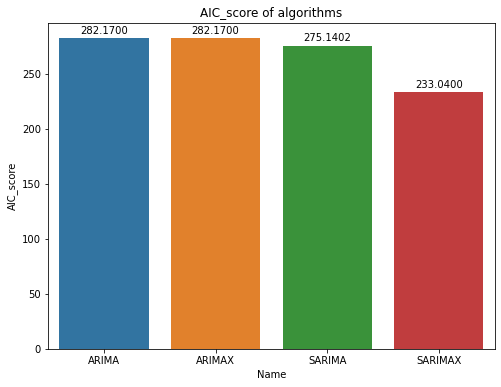

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = fd, x = fd['Name'], y = fd['AIC_score'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("AIC_score of algorithms");

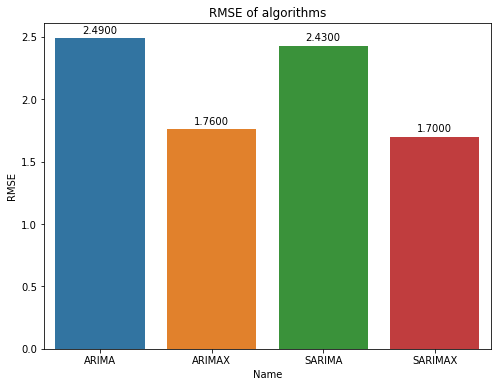

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = fd, x = fd['Name'], y = fd['RMSE'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("RMSE of algorithms");

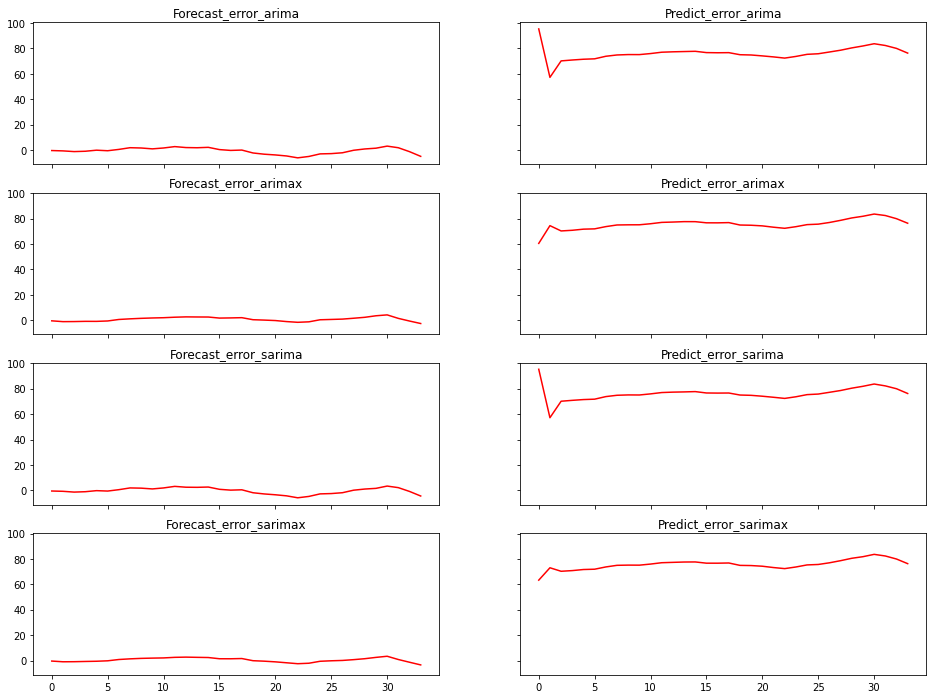

In [50]:
import seaborn as sb
# calculate residuals/errors
p_residuals = [df_final_a['a_actual'].iat[i] - df_final_a['a_predicted'].iat[i] for i in range(len(df_final_a))]
f_residuals = [df_final_a['a_actual'].iat[i] - df_final_a['a_forecasted'].iat[i] for i in range(len(df_final_a))]
residuals_a = pd.DataFrame(list(zip(df_final_a['a_actual'].values, p_residuals, f_residuals)), columns = ['Actual', 'Predict_error_arima', 'Forecast_error_arima'])

p_residuals = [df_final_ax['a_actual'].iat[i] - df_final_ax['a_predicted'].iat[i] for i in range(len(df_final_ax))]
f_residuals = [df_final_ax['a_actual'].iat[i] - df_final_ax['a_forecasted'].iat[i] for i in range(len(df_final_ax))]
residuals_ax = pd.DataFrame(list(zip(df_final_ax['a_actual'].values, p_residuals, f_residuals)), columns = ['Actual', 'Predict_error_arimax', 'Forecast_error_arimax'])

p_residuals = [df_final_s['s_actual'].iat[i] - df_final_s['s_predicted'].iat[i] for i in range(len(df_final_s))]
f_residuals = [df_final_s['s_actual'].iat[i] - df_final_s['s_forecasted'].iat[i] for i in range(len(df_final_s))]
residuals_s = pd.DataFrame(list(zip(df_final_s['s_actual'].values, p_residuals, f_residuals)), columns = ['Actual', 'Predict_error_sarima', 'Forecast_error_sarima'])

p_residuals = [df_final_sx['sx_actual'].iat[i] - df_final_sx['sx_predicted'].iat[i] for i in range(len(df_final_sx))]
f_residuals = [df_final_sx['sx_actual'].iat[i] - df_final_sx['sx_forecasted'].iat[i] for i in range(len(df_final_sx))]
residuals_sx = pd.DataFrame(list(zip(df_final_sx['sx_actual'].values, p_residuals, f_residuals)), columns = ['Actual', 'Predict_error_sarimax', 'Forecast_error_sarimax'])

# plotting errors
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (16, 12), sharey = True, sharex = True)

ax1.plot(residuals_a['Forecast_error_arima'], color = "red")
ax1.set_title('Forecast_error_arima');

ax2.plot(residuals_a['Predict_error_arima'], color = "red")
ax2.set_title('Predict_error_arima');

ax3.plot(residuals_ax['Forecast_error_arimax'], color = "red")
ax3.set_title('Forecast_error_arimax');

ax4.plot(residuals_ax['Predict_error_arimax'], color = "red")
ax4.set_title('Predict_error_arimax');

ax5.plot(residuals_s['Forecast_error_sarima'], color = "red")
ax5.set_title('Forecast_error_sarima');

ax6.plot(residuals_s['Predict_error_sarima'], color = "red")
ax6.set_title('Predict_error_sarima');

ax7.plot(residuals_sx['Forecast_error_sarimax'], color = "red")
ax7.set_title('Forecast_error_sarimax');

ax8.plot(residuals_sx['Predict_error_sarimax'], color = "red")
ax8.set_title('Predict_error_sarimax');

### Future forecast

In [51]:
exog_df = df[['m3', 'cpi', 'gdp', 'm1nsa', 'ddnsa']]
future = pd.DataFrame()
# add a new date colum 
d1 = pd.date_range(start = "1/1/2002", end = "1/1/2009", freq = "Q")
future['tdate'] = d1
len(future)

28


Best Model

p = 0, d = 2, q = 3

P = 2, D = 0, Q = 0

P_value of LJungbox test =  [0.0040895  0.01598596 0.04065361 0.08083386 0.11324644 0.17246861
 0.25114068 0.25453074 0.33257141 0.36545615 0.43566977 0.51898779
 0.59788645 0.67103994 0.73882453 0.7972413  0.84485607 0.88304731
 0.91004178 0.90878962 0.93380468 0.94775489 0.96293409 0.97298961
 0.98152416 0.98406449 0.98911136 0.99251329 0.99383781 0.99575298]

RMSE =  1.7


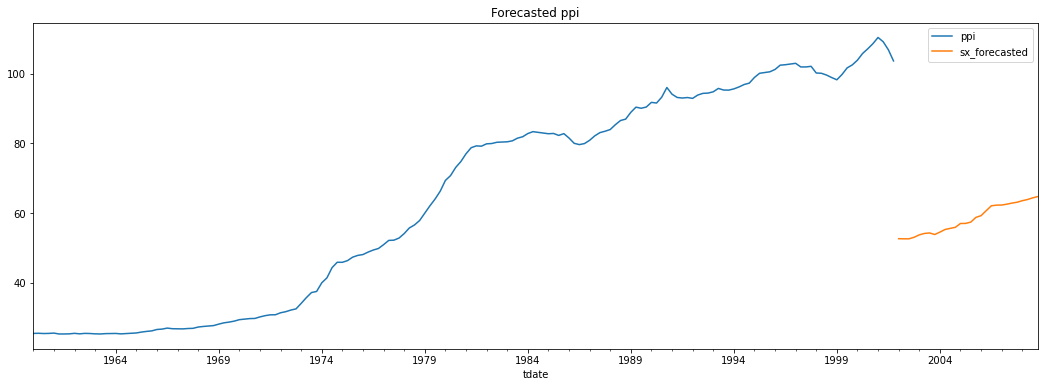

In [52]:
# build model using best params
# generate data for exog - synthetic data
model = SARIMAX(train.values, order = (best_df_sx['p'].iat[0], best_df_sx['d'].iat[0], best_df_sx['q'].iat[0]), seasonal_order = (best_df_sx['P'].iat[0], best_df_sx['D'].iat[0], best_df_sx['Q'].iat[0], 4), exog = exog_train.values).fit()
f = model.forecast(28, exog = exog_train[-29:-1].values)
aic_sx = round(model.aic, 2)

# to store actual, forcasted and predicted values in DF for analysis
forecast = []

for i in f:
    forecast.append(i)
    
df_final_sx_1 = pd.DataFrame({'sx_forecasted': forecast})
future = pd.concat([future,df_final_sx_1], axis = 1)

# plot the actual and forecast data
print("\nBest Model")
print("\np = {}, d = {}, q = {}".format(best_df_sx['p'].iat[0], best_df_sx['d'].iat[0], best_df_sx['q'].iat[0]))
print("\nP = {}, D = {}, Q = {}".format(best_df_sx['P'].iat[0], best_df_sx['D'].iat[0], best_df_sx['Q'].iat[0]))
print('\nP_value of LJungbox test = ', best_df_sx['lj_test'].iat[0])
print('\n\033[1mRMSE = ', best_df_sx['rmse'].iat[0])

future = future.set_index('tdate')
fig, ax = plt.subplots(1, 1, figsize = (18, 6))
df.ppi.plot(legend = True)
future.sx_forecasted.plot(legend = True)
plt.title('Forecasted ppi');

### Conclusion – Best model :
    SARIMAX is the best model for forecasting ppi for the given dataset

### NOTE: 
    Synthetic data needs to be created for exog features in SARIMAX model.

### Insight : 
    -> PPI is 
        decreasing in 2002(economic slowdown)
        increasing after 2002(high rise leads to inflation)


###### 